In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
import seaborn as sns
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2, subject_keys
from cortical_segmentation import cortical_segmentation

# Mask

In [2]:
model, mask_img = load_dypac(subject='sub-01', root_data='/data/cisl/pbellec/cneuromod_embeddings/xp_202012/', fwhm=5, cluster=300, state=900)

In [8]:
img = cortical_segmentation(mask_img)
type_mask = img.keys()

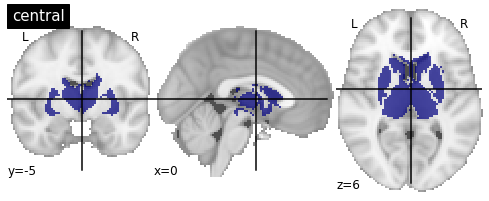

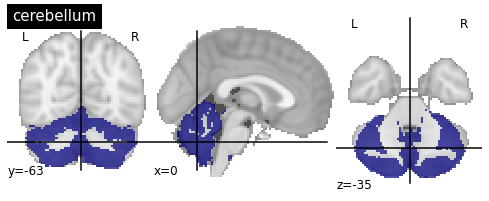

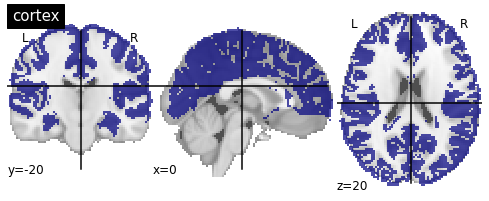

In [13]:
list_mask = list(img.keys())
mask = dict.fromkeys(type_mask)
for type_mask in list_mask:
    mask[type_mask] = (mask_img.get_fdata()>0) & (img[type_mask].get_fdata()>0)
    plotting.plot_roi(image.new_img_like(mask_img, mask[type_mask]), title=type_mask)

# Model

In [14]:
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/'

In [15]:
def parameter_keys(fwhm=[5]):
    cluster = (20, 20, 50, 50, 300)
    state = (60, 120, 150, 300, 900)
    list_keys = []
    for numf in range(len(fwhm)):
        for nump in range(len(cluster)):
            list_keys.append(f'fwhm-{fwhm[numf]}_cluster-{cluster[nump]}_state-{state[nump]}')
    return list_keys

In [ ]:
list_cluster = (20, 20, 50, 50, 300)
list_state = (60, 120, 150, 300, 900)
fwhm = 5
list_subject = subject_keys(6)
val = np.array([])
all_label = np.array([])
type_comp = np.array([])
type_mask = 'cortex'

for nump in range(len(list_cluster)):
    cluster = list_cluster[nump]
    state = list_state[nump]
    print(f'cluster{cluster}_state{state}')
    for sub in list_subject:
        print(sub)
        model, mask_img = load_dypac(subject=sub, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
        
        hdf5_file = load_r2_intra(subject=sub, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
        list_files = list(hdf5_file['validation'].keys())
        
        for file in list_files:
            val = np.append(val, np.mean(np.squeeze(hdf5_file['validation'][file])[mask[type_mask]]))
            type_comp = np.append(type_comp, 'intra')
            all_label = np.append(all_label, f'cluster{cluster}_state{state}')
        
        hdf5_file = load_r2_inter(subject=sub, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
        list_sub2 = list(hdf5_file['inter'].keys())
        for sub2 in list_sub2:
            list_files2 = list(hdf5_file['inter'][sub2].keys())
            for file2 in list_files2:
                val = np.append(val, np.mean(np.squeeze(hdf5_file['inter'][sub2][file2])[mask[type_mask]]))
                type_comp = np.append(type_comp, 'inter')
                all_label = np.append(all_label, f'cluster{cluster}_state{state}')

cluster20_state60
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
cluster20_state120
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
cluster50_state150
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
cluster50_state300
sub-01
sub-02
sub-03
sub-04
sub-05
sub-06
cluster300_state900
sub-01
sub-02
sub-03
sub-04


In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=all_label, y=val, hue=type_comp, scale='area')
plt.ylabel('R2 embedding quality')
plt.title('FWHM=5')

In [ ]:
list_atlas = ['mist197', 'mist444', 'schaefer', 'smith', 'difumo512', 'difumo1024']
fwhm = 5
val = np.array([])
all_label = np.array([])

for atlas in list_atlas:
    print(atlas)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    
    for sub in list_subject:
        print(sub)
        model, mask_img = load_dypac(subject=sub, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
        
        list_files = list(hdf5_file[sub].keys())
        mask = mask_img.get_fdata()>0
        for file in list_files:
            val = np.append(val, np.mean(np.squeeze(hdf5_file[sub][file])[mask]))
            all_label = np.append(all_label, atlas)

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(20, 15))
sns.boxenplot(x=all_label, y=val, scale='area')
plt.ylabel('R2 embedding quality')
plt.title('FWHM=5')

# intra subject

## Training set - interactive viewer 

In [ ]:
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_training = mean_r2(hdf5_file['training'], ref_img=mask_img)
plotting.view_img(r2_training, threshold=0.1, vmax=1)

## Training set - static viewer (all subjects)

In [ ]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_training = mean_r2(hdf5_file['training'], ref_img=mask_img)
    plotting.plot_stat_map(r2_training, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

## Validation set - interactive viewer

In [ ]:
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_training = mean_r2(hdf5_file['validation'], ref_img=mask_img)
plotting.view_img(r2_training, threshold=0.1, vmax=1)

In [ ]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_training = mean_r2(hdf5_file['validation'], ref_img=mask_img)
    plotting.plot_stat_map(r2_training, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

# Inter-subject

## interactive viewer

In [ ]:
hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
plotting.view_img(r2_inter, threshold=0.1, vmax=1)

## static viewer (all subjects)

In [ ]:
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
    r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, colorbar=False)

# Group atlases

## Schaefer

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'schaefer'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

## MIST444

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'mist444'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# MIST197

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'mist197'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# Smith

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'smith'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# DIFUMO 1024 fwhm-5

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'difumo1024'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_inter = mean_inter_r2(hdf5_file, ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)

# DIFUMO 512 fwhm-5

In [ ]:
#list_atlas = ['mist197', 'mist444', 'schaefer', 'smith']
atlas = 'difumo512'
n_comp = 6
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))
hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
for ind_subject in range(1,7):
    subject = f'sub-0{ind_subject}'
    print(subject)
    r2_inter = mean_r2(hdf5_file[subject], ref_img=mask_img)
    plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        axes=plt.subplot(n_comp, 1, ind_subject), threshold=0.1, vmax=1, title=subject, 
        colorbar=False)